<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Normal-Distribution" data-toc-modified-id="Normal-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Normal Distribution</a></span></li><li><span><a href="#Exponential-Distribution" data-toc-modified-id="Exponential-Distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exponential Distribution</a></span></li></ul></div>

# Chapter 4

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Normal Distribution

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


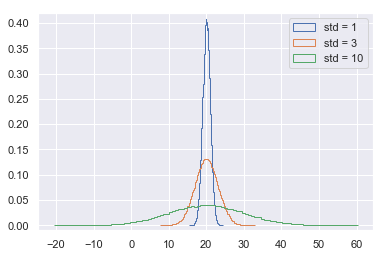

In [14]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


In [15]:
# data prep
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

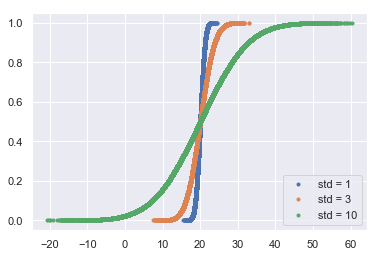

In [16]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


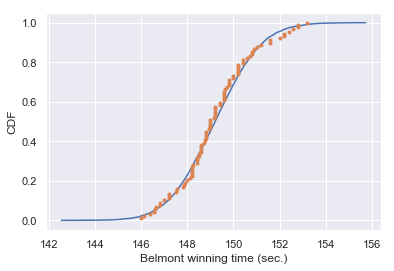

In [17]:
# data prep
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [23]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.00069


## Exponential Distribution